LIBRARIES

In [1]:
!pip3 install fasttext
!pip3 install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296186 sha256=71dada8ad616da86012824781bf7758f3b773798922ff8016ed83d3b96c65a1c
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


CLONING INDICLID REPO FROM GITHUB

In [2]:
!git clone https://github.com/AI4Bharat/IndicLID.git
%cd "/content/IndicLID/Inference"
%mkdir models
%cd "/content/IndicLID/Inference/models"


!wget https://github.com/AI4Bharat/IndicLID/releases/download/v1.0/indiclid-bert.zip
!wget https://github.com/AI4Bharat/IndicLID/releases/download/v1.0/indiclid-ftn.zip
!wget https://github.com/AI4Bharat/IndicLID/releases/download/v1.0/indiclid-ftr.zip
!unzip indiclid-bert.zip
!unzip indiclid-ftn.zip
!unzip indiclid-ftr.zip

%cd "/content/IndicLID/"
%mkdir train_data
%cd "/content/IndicLID/train_data"

Cloning into 'IndicLID'...
remote: Enumerating objects: 337, done.
remote: Counting objects: 100% (337/337), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 337 (delta 148), reused 282 (delta 115), pack-reused 0 (from 0)
Receiving objects: 100% (337/337), 201.63 KiB | 304.00 KiB/s, done.
Resolving deltas: 100% (148/148), done.
/content/IndicLID/Inference
/content/IndicLID/Inference/models
--2024-11-14 20:15:03--  https://github.com/AI4Bharat/IndicLID/releases/download/v1.0/indiclid-bert.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/605931363/efa054ba-62f1-46d2-90b0-71f339a2cd33?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20241114%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20241114T201503Z&X-Amz-Expires=300&X-Amz-Signa

INSTALLING INDICXLIT

In [3]:
!python -m pip install "pip<24.1"
!pip install ai4bharat-transliteration

from ai4bharat.transliteration import XlitEngine

e = XlitEngine(beam_width=10, src_script_type = "indic")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of urduhack to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 4.0 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of urduhack to determine which version is compatible with other requirements. This could t

MB100% (119.0 of 119.0) |################| Elapsed Time: 0:00:05 Time:  0:00:05


Succefully Downloaded to: /usr/local/lib/python3.10/dist-packages/ai4bharat/transliteration/transformer/models/indic2en/v1.0/model.zip
Models downloaded to: /usr/local/lib/python3.10/dist-packages/ai4bharat/transliteration/transformer/models/indic2en/v1.0
NOTE: When uninstalling this library, REMEMBER to delete the models manually


MB100% (2.0 of 2.0) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


Succefully Downloaded to: /usr/local/lib/python3.10/dist-packages/ai4bharat/transliteration/transformer/models/indic2en/v1.0/dicts.zip
Initializing Multilingual model for transliteration


/usr/local/lib/python3.10/dist-packages/fairseq/checkpoint_utils.py:315: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(f, map_location=torch.device("cpu")

FETCHING NATIVE DATA FROM INDICCORPV2 DATASET

In [5]:
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/as.txt | head -n 30000 > as.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/bd.txt | head -n 30000 > bd.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/bn.txt | head -n 30000 > bn.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/en.txt | head -n 30000 > en.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/gom.txt | head -n 30000 > gom.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/gu.txt | head -n 30000 > gu.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/hi.txt | head -n 30000 > hi.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/kn.txt | head -n 30000 > kn.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/ks.txt | head -n 30000 > ks.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/mai.txt | head -n 30000 > mai.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/ml.txt | head -n 30000 > ml.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/mni.txt | head -n 30000 > mni.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/mr.txt | head -n 30000 > mr.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/ne.txt | head -n 30000 > ne.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/or.txt | head -n 30000 > or.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/pa.txt | head -n 30000 > pa.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/sa.txt | head -n 30000 > sa.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/sd.txt | head -n 30000 > sd.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/ta.txt | head -n 30000 > ta.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/te.txt | head -n 30000 > te.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/ur.txt | head -n 30000 > ur.txt


DICTIONARY FROM GENERATING TRANSLIERATED DATA

In [6]:
lang_code_dict = {
    'as' : 'asm_Latn' ,
    'bn' : 'ben_Latn' ,
    'bd' : 'brx_Latn' ,
    'gom': 'kok_Latn' ,
    'gu' : 'guj_Latn' ,
    'hi' : 'hin_Latn' ,
    'kn' : 'kan_Latn' ,
    'ks' : 'kas_Latn' ,
    'mai': 'mai_Latn' ,
    'ml' : 'mal_Latn' ,
    'mni': 'mni_Latn' ,
    'mr' : 'mar_Latn' ,
    'ne' : 'nep_Latn' ,
    'or' : 'ori_Latn' ,
    'pa' : 'pan_Latn' ,
    'sa' : 'san_Latn' ,
    'sd' : 'snd_Latn' ,
    'ta' : 'tam_Latn' ,
    'te' : 'tel_Latn' ,
    'ur' : 'urd_Latn' ,
}

xlit_code_dict = {
    'as' : 'asm_Latn' ,
    'bn' : 'ben_Latn' ,
    'bd' : 'brx_Latn' ,
    'gom': 'kok_Latn' ,
    'gu' : 'guj_Latn' ,
    'hi' : 'hin_Latn' ,
    'kn' : 'kan_Latn' ,
    'ks' : 'kas_Latn' ,
    'mai': 'mai_Latn' ,
    'ml' : 'mal_Latn' ,
    'mni': 'mni_Latn' ,
    'mr' : 'mar_Latn' ,
    'ne' : 'nep_Latn' ,
    'or' : 'ori_Latn' ,
    'pa' : 'pan_Latn' ,
    'sa' : 'san_Latn' ,
    'sd' : 'snd_Latn' ,
    'ta' : 'tam_Latn' ,
    'te' : 'tel_Latn' ,
    'ur' : 'urd_Latn' ,
}

GENERATING TRANSLITERATED DATA USING INDICXLIT

In [8]:
import re
for code, lang in lang_code_dict.items():

	# Traverse the file line by line and transliterate
	file_path = f"/content/IndicLID/train_data/{code}.txt"
	output_file_path = f"/content/IndicLID/train_data/{code}_train.txt"
	output_file = open(output_file_path, 'w', encoding='utf-8')
	i=0
	# Read the file and transliterate each line
	with open(file_path, 'r', encoding='utf-8') as file:
		for line in file:
			if i<20000:
				# Strip any whitespace or newline characters from the line
				line = line.lower()
				line = re.sub(r"[^\w\s,.'\n]", '', line)
				line = re.sub(r'\s+', ' ', line).strip()
				i+=1
				# Transliterate the line using the engine
				if line:  # Ensure it's not an empty line
					xlit_code = 'brx' if code == 'bd' else code
					output = e.translit_sentence(line, xlit_code)
					output_file.write(f"__label__{lang} {output}\n")
					print(f"Input: {line}")
					print(f"__label__{lang} {output}")

	output_file.close()  # Manually closing the file after the loop


Input: ঘটনৰ বৱৰণ মত বককতৰ কলখতত নয়মতভৱ বহ জৱৰ আডডত শকৰবৰ অৰথৎ ১৯ এপৰলৰ নশ পৰকতন সন জৱনজন গল ফটই সনতৰসৰ সষট কৰ বকখতৰ কলখতত নয়মতভৱ বহ এই জৱৰ থলত জৱৰৰ পৰ ধন লটৰ সবৰথত ধত পৰকতন সন জৱন মহন কছৰয় গল ফটই সনতৰস সষট কৰ
__label__asm_Latn ghotonor boworon moto bokokotor kolkhotot nomotvow boho jowor aadodot xokorbor orothot 19 eporolor nox porokoton xon jowonjon goal fotoi xonotoroxor xoxot korr bokhotor kolkhotot nomotvow boho ei jowor tholot joworor por dhana lotor xoborothot dhoto porokoton xon jawan mohon kochoro goal fotoi xonotorox xoxot korr
Input: ৰণ মণডলৰ সৱদ কনঠত মগধ হ ভইজন ছলমন এই উপহৰ দয় বল চৰচ হছ বহত ইয়ক কছ য, ছলমনৰ আহবলগয় ছবৰ বব চকত কৰইছ ৰণ মণডলক কনত আচল কথত হল ছচয়ল মডয়ত পৰচৰত এই সকল খবৰ মছ শহতয়ক টইমছ অফ ইণডয়ই সদৰ কৰছ এই তথয
__label__asm_Latn rone mondolor xobod konothot mogodh hoho bhoijon solmon ei upohor doi boll soros hose bohot ikok coach joy, solmonor aahbologo sobor bob sokot korois rone mondolok konot aasol kothot hall sosolou modot porosorot ei xokol khabar moss xohotok toim

In [10]:
!ls *_train.txt
!cat *_train.txt > train_combine.txt

as_train.txt   gu_train.txt  mai_train.txt  ne_train.txt  sd_train.txt	valid_combine_train.txt
bd_train.txt   hi_train.txt  ml_train.txt   or_train.txt  ta_train.txt
bn_train.txt   kn_train.txt  mni_train.txt  pa_train.txt  te_train.txt
gom_train.txt  ks_train.txt  mr_train.txt   sa_train.txt  ur_train.txt


IMPORT FASTTEXT AND BUILDING MODEL

In [11]:
import fasttext
model = fasttext.load_model('/content/IndicLID/Inference/models/indiclid-ftr/model_baseline_roman.bin')

FINETUNING FASTTEXT FOR ROMANISED DATA

In [12]:
train_data= f"/content/IndicLID/train_data/train_combine.txt"
print(train_data)
model = fasttext.train_supervised(
    input = train_data,
    lr = 0.3,
    dim = 512,
    ws = 5,
    epoch = 4,
    minCount = 1,
    minCountLabel = 0,
    minn = 3,
    maxn = 6,
    neg = 5,
    wordNgrams = 2,
    loss = 'hs',
    lrUpdateRate = 100,
    t = 0.0001,
    verbose = 1
    )



/content/IndicLID/train_data/train_combine.txt


SAVING THE FINETUNED MODEL PARAMETERS

In [13]:
%cd "/content/IndicLID/"
%mkdir finetuned
%mkdir results

/content/IndicLID


In [14]:
model.save_model("/content/IndicLID/finetuned/model_baseline_roman.bin")

EVALUATING ORIGINAL MODEL AND FINETUNED MODEL AGAINST SUBSET OF THE SAME DATA AS USED IN THE PAPER

In [19]:
import csv
import sys

IndicPath='/content/IndicLID/Inference/models/indiclid-ftr/model_baseline_roman.bin'
FinetunePath='/content/IndicLID/finetuned/model_baseline_roman.bin'
model = fasttext.load_model(FinetunePath)

file = open('/content/IndicLID/results/result.txt', 'w')

lines_config = []

lines_config.append('lr : ' + str ( model.f.getArgs().lr ) )
lines_config.append('dim : ' + str ( model.f.getArgs().dim ) )
lines_config.append('ws : ' + str ( model.f.getArgs().ws ) )
lines_config.append('epoch : ' + str ( model.f.getArgs().epoch ) )
lines_config.append('minCount : ' + str ( model.f.getArgs().minCount ) )
lines_config.append('minCountLabel : ' + str ( model.f.getArgs().minCountLabel ) )
lines_config.append('minn : ' + str ( model.f.getArgs().minn ) )
lines_config.append('maxn : ' + str ( model.f.getArgs().maxn ) )
lines_config.append('neg : ' + str ( model.f.getArgs().neg ) )
lines_config.append('wordNgrams : ' + str ( model.f.getArgs().wordNgrams ) )
lines_config.append('loss : ' + str ( model.f.getArgs().loss ) )
lines_config.append('bucket : ' + str ( model.f.getArgs().bucket ) )
lines_config.append('thread : ' + str ( model.f.getArgs().thread ) )
lines_config.append('lrUpdateRate : ' + str ( model.f.getArgs().lrUpdateRate ) )
lines_config.append('t : ' + str ( model.f.getArgs().t ) )
lines_config.append('label : ' + str ( model.f.getArgs().label ) )
lines_config.append('verbose : ' + str ( model.f.getArgs().verbose ) )
lines_config.append('pretrainedVectors : ' + str ( model.f.getArgs().pretrainedVectors ) )




file.write('Hyperparameters (Tuned)')
file.write('\n')
file.write('\n'.join(lines_config))
file.write('\n\n\n\n\n')



result_train = model.test("/content/test_combine.txt")

file.write('Evaluation Results Train Set')
file.write('\n')
file.write('train Set')
file.write('\n')
file.write('Samples : ' + str(result_train[0]) )
file.write('\n')
file.write('precision : ' + str(result_train[1]) )
file.write('\n')
file.write('recall : ' + str(result_train[2]) )
file.write('\n')
file.write('F1-Score : ' + str( (2 * result_train[1] * result_train[2]) / (result_train[1] + result_train[2]) ) )
file.write('\n\n\n')


confusion_matrix_reverse_mapping  = {
    0 : 'Assamese',
    1 : 'Bangla',
    2 : 'Bodo',
    3 : 'Konkani',
    4 : 'Gujarati',
    5 : 'Hindi',
    6 : 'Kannada',
    7 : 'Kashmiri',
    8 : 'Maithili',
    9 : 'Malayalam',
    10 : 'Manipuri',
    11 : 'Marathi',
    12 : 'Nepali',
    13 : 'Oriya',
    14 : 'Punjabi',
    15 : 'Sanskrit',
    16 : 'Sindhi',
    17 : 'Tamil',
    18 : 'Telugu',
    19 : 'Urdu',
    20 : 'English',
    21 : 'Other'
}

confusion_matrix_mapping  = {
    'Assamese' : 0,
    'Bangla' : 1,
    'Bodo' : 2,
    'Konkani' : 3,
    'Gujarati' : 4,
    'Hindi' : 5,
    'Kannada' : 6,
    'Kashmiri' : 7,
    'Maithili' : 8,
    'Malayalam' : 9,
    'Manipuri' : 10,
    'Marathi' : 11,
    'Nepali' : 12,
    'Oriya' : 13,
    'Punjabi' : 14,
    'Sanskrit' : 15,
    'Sindhi' : 16,
    'Tamil' : 17,
    'Telugu' : 18,
    'Urdu' : 19,
    'English' : 20,
    'Other' : 21
}

IndicLID_lang_code_dict = {
    'asm_Latn' : 0,
    'ben_Latn' : 1,
    'brx_Latn' : 2,
	'kok_Latn' : 3,
    'guj_Latn' : 4,
    'hin_Latn' : 5,
    'kan_Latn' : 6,
    'kas_Latn' : 7,
    'mai_Latn' : 8,
    'mal_Latn' : 9,
    'mni_Latn' : 10,
    'mar_Latn' : 11,
    'nep_Latn' : 12,
    'ori_Latn' : 13,
    'pan_Latn' : 14,
    'san_Latn' : 15,
    'snd_Latn' : 16,
    'tam_Latn' : 17,
    'tel_Latn' : 18,
    'urd_Latn' : 19,
    'eng_Latn' : 20,
    'other' : 21,
    'asm_Beng' : 22,
    'ben_Beng' : 23,
    'brx_Deva' : 24,
    'doi_Deva' : 25,
    'guj_Gujr' : 26,
    'hin_Deva' : 27,
    'kan_Knda' : 28,
    'kas_Arab' : 29,
    'kas_Deva' : 30,
    'kok_Deva' : 31,
    'mai_Deva' : 32,
    'mal_Mlym' : 33,
    'mni_Beng' : 34,
    'mni_Meti' : 35,
    'mar_Deva' : 36,
    'nep_Deva' : 37,
    'ori_Orya' : 38,
    'pan_Guru' : 39,
    'san_Deva' : 40,
    'sat_Olch' : 41,
    'snd_Arab' : 42,
    'tam_Tamil' : 43,
    'tel_Telu' : 44,
    'urd_Arab' : 45,
    #'mni_Latn_Mei' : 10,
    #'Other' : 21,
    #'English' : 20

}

IndicLID_lang_code_dict_reverse = {
    0 : 'asm_Latn',
    1 : 'ben_Latn',
    2 : 'brx_Latn',
    4 : 'guj_Latn',
    5 : 'hin_Latn',
    6 : 'kan_Latn',
    7 : 'kas_Latn',
    3 : 'kok_Latn',
    8 : 'mai_Latn',
    9 : 'mal_Latn',
    10 : 'mni_Latn',
    11 : 'mar_Latn',
    12 : 'nep_Latn',
    13 : 'ori_Latn',
    14 : 'pan_Latn',
    15 : 'san_Latn',
    16 : 'snd_Latn',
    17 : 'tam_Latn',
    18 : 'tel_Latn',
    19 : 'urd_Latn',
    20 : 'eng_Latn',
    21 : 'other',
    22 : 'asm_Beng',
    23 : 'ben_Beng',
    24 : 'brx_Deva',
    25 : 'doi_Deva',
    26 : 'guj_Gujr',
    27 : 'hin_Deva',
    28 : 'kan_Knda',
    29 : 'kas_Arab',
    30 : 'kas_Deva',
    31 : 'kok_Deva',
    32 : 'mai_Deva',
    33 : 'mal_Mlym',
    34 : 'mni_Beng',
    35 : 'mni_Meti',
    36 : 'mar_Deva',
    37 : 'nep_Deva',
    38 : 'ori_Orya',
    39 : 'pan_Guru',
    40 : 'san_Deva',
    41 : 'sat_Olch',
    42 : 'snd_Arab',
    43 : 'tam_Tamil',
    44 : 'tel_Telu',
    45 : 'urd_Arab'
}


def evaluate(test_file_name):

    classes = 22

    # inference for Dakshina, test_combine_dakshina
    file_test = open('/content/'+test_file_name+'.txt', 'r')
    lines_test = file_test.read().split('\n')
    file_test.close()


    # save predictions
    file_predictions = open('/content/IndicLID/results/predictions_'+test_file_name+'.csv', 'w')
    csv_writer_predictions = csv.writer(file_predictions)
    csv_writer_predictions.writerow( [ 'Sentence', 'Ground truth', 'Prediction', 'Score' ] )

    file_predictions_right = open('/content/IndicLID/results/right_predictions_'+test_file_name+'.csv', 'w')
    csv_writer_predictions_right = csv.writer(file_predictions_right)
    csv_writer_predictions_right.writerow( [ 'Sentence', 'Ground truth', 'Prediction', 'Score' ] )


    file_predictions_wrong = open('/content/IndicLID/results/wrong_predictions_'+test_file_name+'.csv', 'w')
    csv_writer_predictions_wrong = csv.writer(file_predictions_wrong)
    csv_writer_predictions_wrong.writerow( [ 'Sentence', 'Ground truth', 'Prediction', 'Score' ] )



    # Computing confusion matrix
    confusion_matrix = []
    for i in range(classes):
        confusion_matrix.append( [0]*classes )

    # to calculate accuracy and save right and wrong prediction
    count = 0
    n = 0
    for line in lines_test:
        label = line.split(' ')[0]
        sen = ' '.join(line.split(' ')[1:])
        pred_label = model.predict(sen)[0][0]
        pred_score = model.predict(sen)[1][0]

        if pred_label == label:
            count+=1
            csv_writer_predictions_right.writerow( [ sen, label, pred_label, pred_score ] )
        else:
            csv_writer_predictions_wrong.writerow( [ sen, label, pred_label, pred_score ] )
        n+=1
        #print("This is label : "+label)
        #print("This is label : "+pred_label)


        if len(label[9:])>0:
          print("This file label : "+label[9:])
          print("This model label : "+pred_label[9:])
          confusion_matrix[ IndicLID_lang_code_dict[label[9:]] ][ IndicLID_lang_code_dict[pred_label[9:]] ] += 1
          csv_writer_predictions.writerow( [ sen, label, pred_label, pred_score ] )




    # Computing precision, recall and f1
    precsison_recall_f1 = []
    for i in range(classes):
        precsison_recall_f1.append([0] * 3)

    precision_denominator = 0
    recall_denominator = 0
    f1_denominator = 0

    for i in range(classes):
        no_of_correctly_predicted = confusion_matrix[i][i]
        total_predictions_as_i = 0

        precision = 0
        recall = 0
        f1_value = 0

        # true predicted i values out of all predicted i values
        for j in range(classes):
            total_predictions_as_i += confusion_matrix[j][i]
        if (total_predictions_as_i != 0):
            precision = no_of_correctly_predicted/total_predictions_as_i
            precision_denominator += 1

        # true predicted i values out of all actual i values
        total_actual_values_of_i = sum(confusion_matrix[i])
        if (total_actual_values_of_i != 0):
            recall = no_of_correctly_predicted/total_actual_values_of_i
            recall_denominator += 1

        # f1 score
        if (precision + recall != 0):
            f1_value = (2 * precision * recall) / (precision + recall)
            f1_denominator += 1

        precsison_recall_f1[i][0] = precision
        precsison_recall_f1[i][1] = recall
        precsison_recall_f1[i][2] = f1_value

    avg_precision = sum([precsison_recall_f1[i][0] for i in range(classes)]) / precision_denominator
    avg_recall = sum([precsison_recall_f1[i][1] for i in range(classes)]) / recall_denominator
    avg_f1_score = sum([precsison_recall_f1[i][2] for i in range(classes)]) / f1_denominator



    # to save confusion matrix and precision recall matrix

    for i in range(classes):
        precsison_recall_f1[i].insert(0, confusion_matrix_reverse_mapping[i])

    precsison_recall_f1.insert( 0, ['', 'precision', 'recall', 'f1'])
    precsison_recall_f1.append( ['Avg', avg_precision, avg_recall, avg_f1_score] )


    file_precision_recall_f1 = open('/content/IndicLID/results/precision_recall_f1_'+test_file_name+'.csv', 'w')
    precision_recall_f1_csv_writer = csv.writer(file_precision_recall_f1)

    for i in range(classes+2):
        precision_recall_f1_csv_writer.writerow(precsison_recall_f1[i])
    file_precision_recall_f1.close()



    # save confusion matrix
    for i in range(classes):
        confusion_matrix[i].insert(0, confusion_matrix_reverse_mapping[i] )

    confusion_matrix.insert( 0, [''] + [confusion_matrix_reverse_mapping[i] for i in range(classes)] )


    file_confusion_matrix = open('/content/IndicLID/results/confusion_matrix_'+test_file_name+'.csv', 'w')
    confusion_matrix_csv_writer = csv.writer(file_confusion_matrix)

    for i in range(classes+1):
        confusion_matrix_csv_writer.writerow(confusion_matrix[i])


    file_confusion_matrix.close()
    file_predictions.close()
    file_predictions_right.close()
    file_predictions_wrong.close()




    # fasttext evaluation scores
    test_acc = count/n
    result_test = model.test('/content/test_combine.txt')
    file.write('fasttext evaluation scores - ' + test_file_name + '\n')
    file.write('Samples : ' + str(result_test[0]) + '\n')
    file.write('precision : ' + str(result_test[1]) + '\n')
    file.write('recall : ' + str(result_test[2]) + '\n')
    file.write('F1-Score : ' + str( (2 * result_test[1] * result_test[2]) / (result_test[1] + result_test[2]) ) + '\n')
    file.write('Accuracy : ' + str(test_acc) + '\n')
    file.write('\n\n\n')

evaluate('test_combine')

file.close()

Streaming output truncated to the last 5000 lines.
This file label : urd_Latn
This model label : hin_Latn
This file label : urd_Latn
This model label : urd_Latn
This file label : urd_Latn
This model label : hin_Latn
This file label : urd_Latn
This model label : hin_Latn
This file label : urd_Latn
This model label : urd_Latn
This file label : urd_Latn
This model label : urd_Latn
This file label : urd_Latn
This model label : urd_Latn
This file label : urd_Latn
This model label : urd_Latn
This file label : urd_Latn
This model label : urd_Latn
This file label : urd_Latn
This model label : urd_Latn
This file label : urd_Latn
This model label : urd_Latn
This file label : urd_Latn
This model label : urd_Latn
This file label : urd_Latn
This model label : urd_Latn
This file label : urd_Latn
This model label : hin_Latn
This file label : urd_Latn
This model label : urd_Latn
This file label : urd_Latn
This model label : urd_Latn
This file label : urd_Latn
This model label : urd_Latn
This file labe

CONFUSION MATRIX FOR INDICLID FTR

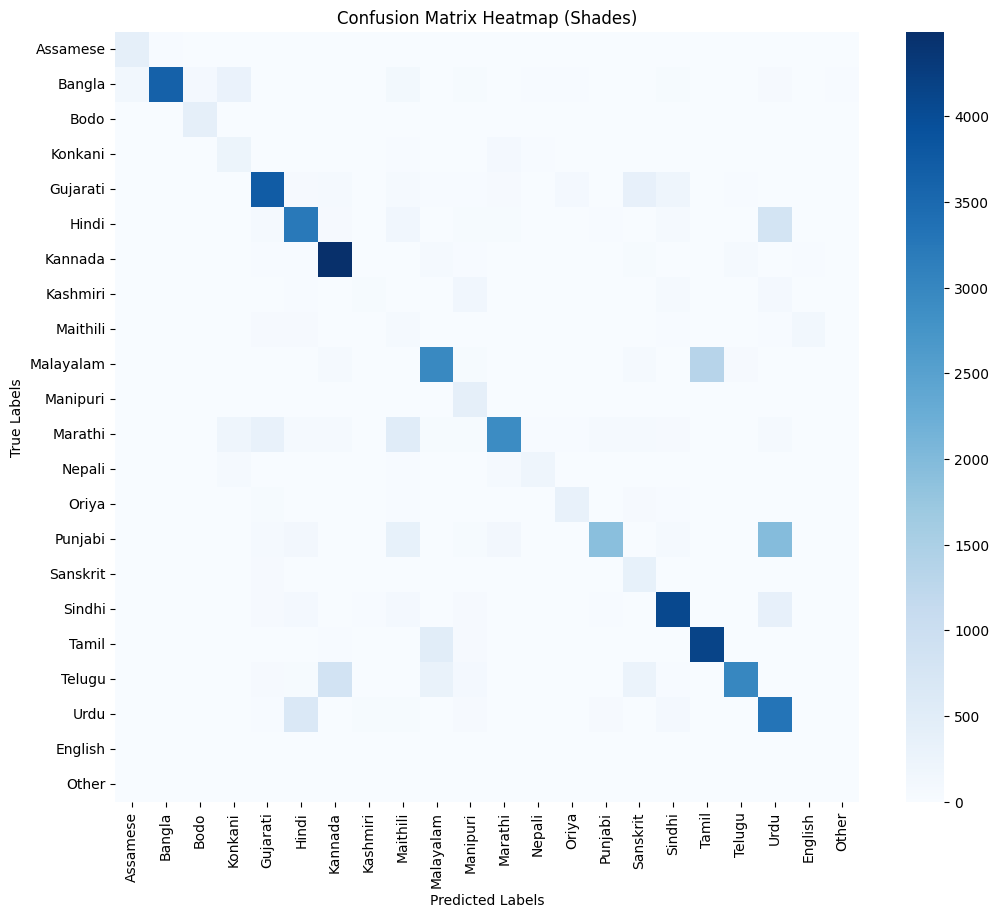

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the confusion matrix from a CSV file
file_path = '/content/IndicLID/results/confusion_matrix_test_combine.csv'  # Update with your file path
confusion_matrix_df = pd.read_csv(file_path)

# Convert the dataframe to set the first column as an index (assuming it contains row labels)
confusion_matrix = confusion_matrix_df.set_index(confusion_matrix_df.columns[0])

# Plotting the heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix, annot=False, cmap="Blues", cbar=True)
plt.title("Confusion Matrix Heatmap (Shades)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Normalised Confusion Matrix FOR INDICLID FTR(Recall)

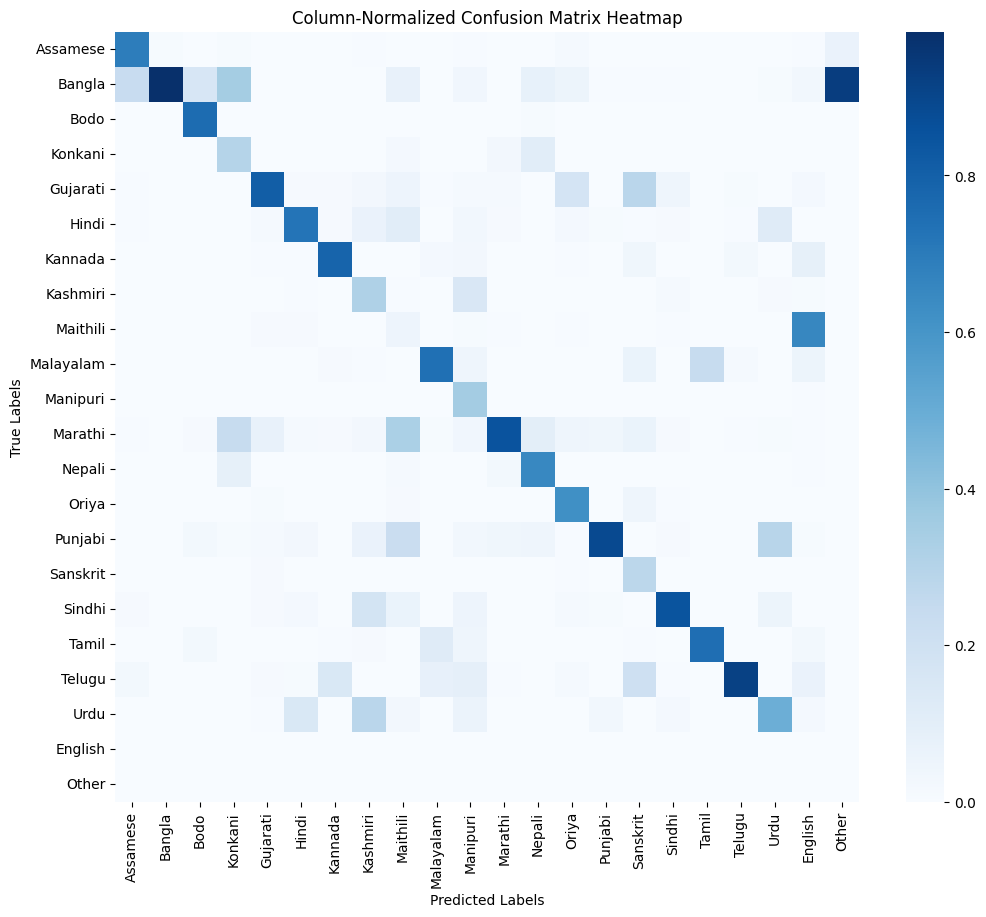

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the confusion matrix from a CSV file
file_path = '/content/IndicLID/results/confusion_matrix_test_combine.csv'  # Update with your file path
confusion_matrix_df = pd.read_csv(file_path)

# Convert the dataframe to set the first column as an index (assuming it contains row labels)
confusion_matrix = confusion_matrix_df.set_index(confusion_matrix_df.columns[0])

#Diagonal is True Positive / (True Positive+False Negative)
confusion_matrix_col_norm = confusion_matrix.div(confusion_matrix.sum(axis=0), axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix_col_norm, annot=False, cmap="Blues", cbar=True)
plt.title("Column-Normalized Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


PRECISION-RECALL PARAMETERS FOR INDICLID FTR

In [22]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/IndicLID/results/precision_recall_f1_test_combine.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data.columns = [column.upper() for column in data.columns]

# Display the data as a styled table with solid borders
styled_table = data.style.set_table_styles(
    [{'selector': 'table', 'props': [('border-collapse', 'collapse')]},
     {'selector': 'th', 'props': [('border', '1px solid black'), ('padding', '8px')]},
     {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '8px')]}]
).set_properties(**{'text-align': 'center'})

# Render the styled table
styled_table


,UNNAMED: 0,PRECISION,RECALL,F1
0,Assamese,0.694118,0.806641,0.746161
1,Bangla,0.983554,0.793043,0.878084
2,Bodo,0.753131,0.972286,0.848790
3,Konkani,0.296678,0.583333,0.393318
4,Gujarati,0.809028,0.778451,0.793445
5,Hindi,0.724894,0.702884,0.713719
6,Kannada,0.784567,0.926789,0.849768
7,Kashmiri,0.318519,0.095768,0.147260
8,Maithili,0.051680,0.182648,0.080564
9,Malayalam,0.739282,0.641020,0.686654
